# Data Wrangling

## Table of Contents
- [Introduction](#intro)
- [Data Gathering](#gather)
- [Data Assessing](#assessing)
- [Data Cleaning](#cleaning)
- [Data Storing](#storing)
- [Data Analyzing](#analyzing)
- [Data Visualizing](#visualizing)

<a id='intro'></a>
## Introduction
<div style="text-align: justify">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The current project has as its' aim to cover all the data wrangling steps with the WeRateDogs Twitter Archive. First, the Twitter archive data was gathered from a .csv file provided by Udacity, a tweet image predictions file was downloaded programmatically from Udacity's servers, and additional tweet information was obtained by a query in the Twitter API, being the JSON data stored in a .txt file considering the tweet IDs provided in the first archive file.
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Next, the data was assessed programmatically and visually in order to verify for quality and tidiness. All quality and tidiness issues that were detected are written in this session of the analysis. After noticing such issues, the data cleaning procedure was done in order to obtain a high quality and tidy master DataFrame. This master DataFrame was stored in a final CSV file. Finally, it was performed data analysis and visualization, which provided some insights about the Tweet archive.
</div>

<a id='gather'></a>
### Data Gathering

In [2]:
# Import packages
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time

#### Enhanced Twitter Archive

In [3]:
# Gather data from the enhanced Twitter archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### Image Prediction Data

In [3]:
# Gather data from image prediction
# Indicating the url to access, requesting its data from the server and storing it in a variable named response
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# Writing a new file with the content of the url (opening a file object, naming it as the last part of the url 
# and saving it with the response content):
with open(os.path.join(os.getcwd(), 
                        url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

#### Twitter API Data

In [6]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
tweet_json_min = []
tweet_del = {}

# As querying all IDs is time demanding, for sanity reasons it is printed the tweet ID and used a code timer
count = 0
start = time.time() 

# Set JSON file to store tweets
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in twitter_archive['tweet_id']:
        count += 1
        print(str(count) + ': ' + str(tweet_id))
        try:      
            # Access tweet
            tweet = api.get_status(tweet_id, tweet_mode='extended')       
            # Save retweet and favorite count
            retweet_count = tweet.retweet_count
            favorite_count = tweet.favorite_count
            # Writing JSON file with each tweet's set of JSON data
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            # Write a list with minimum information
            tweet_json_min.append({'tweet_ids': tweet_id, 'retweet_count': retweet_count,'favorite_count': favorite_count})

        # Try to get the exceptions 
        except Exception as e:
            print('\033[1;31m' + str(tweet_id) + '\033[1;m')
            print()
            tweet_del[tweet_id] = e

end = time.time()
print(end-start)

1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
888202515573088257

21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888


329: 833722901757046785
330: 833479644947025920
331: 833124694597443584
332: 832998151111966721
333: 832769181346996225
334: 832757312314028032
335: 832682457690300417
336: 832645525019123713
337: 832636094638288896
338: 832397543355072512
339: 832369877331693569
340: 832273440279240704
341: 832215909146226688
342: 832215726631055365
343: 832088576586297345
344: 832040443403784192
345: 832032802820481025
346: 831939777352105988
347: 831926988323639298
348: 831911600680497154
349: 831670449226514432
350: 831650051525054464
351: 831552930092285952
352: 831322785565769729
353: 831315979191906304
354: 831309418084069378
355: 831262627380748289
356: 830956169170665475
357: 830583320585068544
358: 830173239259324417
359: 830097400375152640
360: 829878982036299777
361: 829861396166877184
362: 829501995190984704
363: 829449946868879360
364: 829374341691346946
829374341691346946

365: 829141528400556032
366: 829011960981237760
367: 828801551087042563
368: 828770345708580865
369: 828708714936930

666: 790698755171364864
667: 790581949425475584
668: 790337589677002753
669: 790277117346975746
670: 790227638568808452
671: 789986466051088384
672: 789960241177853952
673: 789903600034189313
674: 789628658055020548
675: 789599242079838210
676: 789530877013393408
677: 789314372632018944
678: 789280767834746880
679: 789268448748703744
680: 789137962068021249
681: 788908386943430656
682: 788765914992902144
683: 788552643979468800
684: 788412144018661376
685: 788178268662984705
686: 788150585577050112
687: 788070120937619456
688: 788039637453406209
689: 787810552592695296
690: 787717603741622272
691: 787397959788929025
692: 787322443945877504
693: 787111942498508800
694: 786963064373534720
695: 786729988674449408
696: 786709082849828864
697: 786664955043049472
698: 786595970293370880
699: 786363235746385920
700: 786286427768250368
701: 786233965241827333
702: 786051337297522688
703: 786036967502913536
704: 785927819176054784
705: 785872687017132033
706: 785639753186217984
707: 78553338651

Rate limit reached. Sleeping for: 127


935: 753420520834629632
936: 753398408988139520
937: 753375668877008896
938: 753298634498793472
939: 753294487569522689
940: 753039830821511168
941: 753026973505581056
942: 752932432744185856
943: 752917284578922496
944: 752701944171524096
945: 752682090207055872
946: 752660715232722944
947: 752568224206688256
948: 752519690950500352
949: 752334515931054080
950: 752309394570878976
951: 752173152931807232
952: 751950017322246144
953: 751937170840121344
954: 751830394383790080
955: 751793661361422336
956: 751598357617971201
957: 751583847268179968
958: 751538714308972544
959: 751456908746354688
960: 751251247299190784
961: 751205363882532864
962: 751132876104687617
963: 750868782890057730
964: 750719632563142656
965: 750506206503038976
966: 750429297815552001
967: 750383411068534784
968: 750381685133418496
969: 750147208377409536
970: 750132105863102464
971: 750117059602808832
972: 750101899009982464
973: 750086836815486976
974: 750071704093859840
975: 750056684286914561
976: 75004162817

1266: 709901256215666688
1267: 709852847387627521
1268: 709566166965075968
1269: 709556954897764353
1270: 709519240576036864
1271: 709449600415961088
1272: 709409458133323776
1273: 709225125749587968
1274: 709207347839836162
1275: 709198395643068416
1276: 709179584944730112
1277: 709158332880297985
1278: 709042156699303936
1279: 708853462201716736
1280: 708845821941387268
1281: 708834316713893888
1282: 708810915978854401
1283: 708738143638450176
1284: 708711088997666817
1285: 708479650088034305
1286: 708469915515297792
1287: 708400866336894977
1288: 708356463048204288
1289: 708349470027751425
1290: 708149363256774660
1291: 708130923141795840
1292: 708119489313951744
1293: 708109389455101952
1294: 708026248782585858
1295: 707995814724026368
1296: 707983188426153984
1297: 707969809498152960
1298: 707776935007539200
1299: 707741517457260545
1300: 707738799544082433
1301: 707693576495472641
1302: 707629649552134146
1303: 707610948723478529
1304: 707420581654872064
1305: 707411934438625280


1594: 686386521809772549
1595: 686377065986265092
1596: 686358356425093120
1597: 686286779679375361
1598: 686050296934563840
1599: 686035780142297088
1600: 686034024800862208
1601: 686007916130873345
1602: 686003207160610816
1603: 685973236358713344
1604: 685943807276412928
1605: 685906723014619143
1606: 685681090388975616
1607: 685667379192414208
1608: 685663452032069632
1609: 685641971164143616
1610: 685547936038666240
1611: 685532292383666176
1612: 685325112850124800
1613: 685321586178670592
1614: 685315239903100929
1615: 685307451701334016
1616: 685268753634967552
1617: 685198997565345792
1618: 685169283572338688
1619: 684969860808454144
1620: 684959798585110529
1621: 684940049151070208
1622: 684926975086034944
1623: 684914660081053696
1624: 684902183876321280
1625: 684880619965411328
1626: 684830982659280897
1627: 684800227459624960
1628: 684594889858887680
1629: 684588130326986752
1630: 684567543613382656
1631: 684538444857667585
1632: 684481074559381504
1633: 684460069371654144


Rate limit reached. Sleeping for: 20


1835: 676121918416756736
1836: 676101918813499392
1837: 676098748976615425
1838: 676089483918516224
1839: 675898130735476737
1840: 675891555769696257
1841: 675888385639251968
1842: 675878199931371520
1843: 675870721063669760
1844: 675853064436391936
1845: 675849018447167488
1846: 675845657354215424
1847: 675822767435051008
1848: 675820929667219457
1849: 675798442703122432
1850: 675781562965868544
1851: 675740360753160193
1852: 675710890956750848
1853: 675707330206547968
1854: 675706639471788032
1855: 675534494439489536
1856: 675531475945709568
1857: 675522403582218240
1858: 675517828909424640
1859: 675501075957489664
1860: 675497103322386432
1861: 675489971617296384
1862: 675483430902214656
1863: 675432746517426176
1864: 675372240448454658
1865: 675362609739206656
1866: 675354435921575936
1867: 675349384339542016
1868: 675334060156301312
1869: 675166823650848770
1870: 675153376133427200
1871: 675149409102012420
1872: 675147105808306176
1873: 675146535592706048
1874: 675145476954566656


2163: 669393256313184256
2164: 669375718304980992
2165: 669371483794317312
2166: 669367896104181761
2167: 669363888236994561
2168: 669359674819481600
2169: 669354382627049472
2170: 669353438988365824
2171: 669351434509529089
2172: 669328503091937280
2173: 669327207240699904
2174: 669324657376567296
2175: 669216679721873412
2176: 669214165781868544
2177: 669203728096960512
2178: 669037058363662336
2179: 669015743032369152
2180: 669006782128353280
2181: 669000397445533696
2182: 668994913074286592
2183: 668992363537309700
2184: 668989615043424256
2185: 668988183816871936
2186: 668986018524233728
2187: 668981893510119424
2188: 668979806671884288
2189: 668975677807423489
2190: 668967877119254528
2191: 668960084974809088
2192: 668955713004314625
2193: 668932921458302977
2194: 668902994700836864
2195: 668892474547511297
2196: 668872652652679168
2197: 668852170888998912
2198: 668826086256599040
2199: 668815180734689280
2200: 668779399630725120
2201: 668655139528511488
2202: 668645506898350081


In [9]:
# Create DataFrame from list of dictionaries tweet ids and retweets and favorite counts
df_tweet_json_min = pd.DataFrame(tweet_json_min, columns = ['tweet_ids', 'retweet_count', 'favorite_count'], dtype = 'int')

In [5]:
# Read txt file and extrac information to a list
tweet_list = []       
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        tweet_list.append({'tweet_ids': tweet_id, 'retweet_count': retweet_count,'favorite_count': favorite_count})

In [6]:
# Transform list into a dataframe
tweet_API = pd.DataFrame(tweet_list, columns = ['tweet_ids', 'retweet_count', 'favorite_count'], dtype = 'int')

In [48]:
tweet_API

,tweet_ids,retweet_count,favorite_count
0,892420643555336193,7734,36348
1,892177421306343426,5727,31312
2,891815181378084864,3789,23589
3,891689557279858688,7901,39660
4,891327558926688256,8520,37851
...,...,...,...
2326,666049248165822465,40,96
2327,666044226329800704,132,273
2328,666033412701032449,41,112
2329,666029285002620928,42,121



<a id='assessing'></a>
### Data Assessing

In [17]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [51]:
twitter_archive.rating_denominator.sort_values(ascending=False)

1120    170
902     150
1634    130
1779    120
1635    110
       ... 
1575     10
1576     10
516       7
2335      2
313       0
Name: rating_denominator, Length: 2356, dtype: int64

In [52]:
twitter_archive[twitter_archive.rating_denominator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [13]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
            ... 
Sobe           1
Schnitzel      1
his            1
Ashleigh       1
Edd            1
Name: name, Length: 957, dtype: int64

In [53]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [54]:
twitter_archive[(twitter_archive['doggo'] != 'None') & ((twitter_archive['puppo'] != 'None') | 
              (twitter_archive['floofer'] != 'None') | (twitter_archive['pupper'] != 'None')) ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [19]:
# Verify if dog names were extracted correctly
twitter_archive.text.str.extract(r'( [A-Z][a-z]*)?( [A-Z][a-z]*)?( [A-Z][a-z]*)?( [A-Z][a-z]*)')

,0,1,2,3
0,NaN,NaN,NaN,Phineas
1,NaN,NaN,NaN,Tilly
2,NaN,NaN,NaN,Archie
3,NaN,NaN,NaN,Darla
4,NaN,NaN,NaN,Franklin
...,...,...,...,...
2351,NaN,NaN,NaN,Enjoys
2352,Piers,NaN,NaN,Morgan
2353,NaN,NaN,NaN,Big
2354,NaN,NaN,NaN,Mitsubishi


In [173]:
# Verify if dog ratings were extracted correctly
twitter_archive.text.str.extract(r'[^/] ?(\d*?\.?\d*)/(\d*)')

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [206]:
twitter_archive.text.str.extract(r'[^/] ?(\d*?\.?\d*)/(\d*)')[0][:885][(twitter_archive.text.str.extract(r'[^/] ?(\d*?\.?\d*)/(\d*)')[0][:885].astype('float') != twitter_archive.rating_numerator[:885])]

45      13.5
340     9.75
695     9.75
701        3
763    11.27
805      .10
Name: 0, dtype: object

In [132]:
twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [188]:
twitter_archive.text.str.extract(r'[^/] ?(\d*?\.?\d*)/(\d*)')[0].unique()

array(['13', '12', '14', '13.5', '17', '11', '10', '420', '666', '6',
       '15', '182', '960', '0', '9.75', '007', '84', '7', '9', '24', '8',
       '1', '3', '5', '11.27', '.10', '4', '', '165', '1776', '.11', '.9',
       '204', '50', '99', '80', '.12', '45', '.13', '60', '44', '.8', '2',
       '143', '121', '20', '9.5', '11.26', '144', '88'], dtype=object)

In [46]:
twitter_archive.rating_numerator.isnull().sum()
twitter_archive.rating_denominator.isnull().sum()

0

In [8]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
image_prediction.shape

(2075, 12)

In [65]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
1592,798673117451325440,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
1788,829861396166877184,https://pbs.twimg.com/media/C4RCiIHWYAAwgJM.jpg,1,Border_terrier,0.394486,True,Staffordshire_bullterrier,0.376574,True,American_Staffordshire_terrier,0.031292,True
1372,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,chow,0.999953,True,Tibetan_mastiff,0.000023,True,dhole,0.000003,False
701,684880619965411328,https://pbs.twimg.com/media/CYEvSaRWwAAukZ_.jpg,1,clog,0.081101,False,spindle,0.066957,False,agama,0.060884,False
2045,886366144734445568,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True
242,670449342516494336,https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg,1,peacock,0.999924,False,European_gallinule,0.000030,False,agama,0.000022,False
1988,872820683541237760,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,3,pug,0.999120,True,French_bulldog,0.000552,True,bull_mastiff,0.000073,True
1980,871032628920680449,https://pbs.twimg.com/media/DBaHi3YXgAE6knM.jpg,1,kelpie,0.398053,True,macaque,0.068955,False,dingo,0.050602,False
1781,828708714936930305,https://pbs.twimg.com/media/C4AqLSgVYAEg8nt.jpg,1,hippopotamus,0.942911,False,Mexican_hairless,0.008388,True,ice_lolly,0.006206,False


In [13]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_prediction.tweet_id.nunique()

2075

In [55]:
image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pole                    1
standard_schnauzer      1
clumber                 1
bighorn                 1
park_bench              1
Name: p1, Length: 378, dtype: int64

In [56]:
image_prediction.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
projectile              1
chain_mail              1
komondor                1
hotdog                  1
banded_gecko            1
Name: p2, Length: 405, dtype: int64

In [57]:
image_prediction.p3.value_counts()

Labrador_retriever          79
Chihuahua                   58
golden_retriever            48
Eskimo_dog                  38
kelpie                      35
                            ..
pier                         1
bell_cote                    1
Sussex_spaniel               1
European_fire_salamander     1
affenpinscher                1
Name: p3, Length: 408, dtype: int64

In [61]:
image_prediction[image_prediction.p1 == 'pole']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1956,864873206498414592,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,pole,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False


In [49]:
tweet_API.head()

,tweet_ids,retweet_count,favorite_count
0,892420643555336193,7734,36348
1,892177421306343426,5727,31312
2,891815181378084864,3789,23589
3,891689557279858688,7901,39660
4,891327558926688256,8520,37851


In [50]:
tweet_API.shape

(2331, 3)

#### Quality
##### Twitter archive table
* We should not include tweets that are retweets. 
* `expanded_url` has missing entries.
* `timestamp` should be a datetime type.
* `source` column has confusing data.
* The dog `name` is none for many entries. Change data type.
* The dog `name` has names identified wrongly.
* The dog `name` identified as a or by.
* Display full content of the text column.
* Remove URL from the text column.
* `rating_denominator` has really high maximum values (should it be up to 10?).
* `rating_numerator` is not accurate for all entries, i.e. those that have a ..
* Dog stages are defined as None instead of NaN.

##### Image prediction table
* There missing values (there are only 2075 ID entries, less than the ID entries number for twitter_archive)
* There are images that do not identify dogs.
* Multiple types of dog breed spelling.

##### Twitter API table
* There missing values (there are only 2331 ID entries).
* Favorite counts should be an integer.
* Tweet counts should be an integer.

#### Tidiness
* Only one table is necessary and it could have the following columns: 'tweet_id', 'timestamp', 'source, 'text', 'url', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'dog_prediction', 'retweet_count', 'favorite_count'.

##### Twitter archive table
* `expanded_url` has multiple URLs in one cell.
* Dog stage should be just one column.

##### Image prediction table
* Need just one column for the true prediction.


<a id='cleaning'></a>
### Data Cleaning

In [1595]:
# Copy the datasets before cleaning
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_API_clean = tweet_API.copy()

#### Tidiness
* Some tidiness issues are being handled first in order to facilitate the consideration of missing data and merging of DataFrames.

**`image_prediction` data: Need just one column for the true prediction**

##### Define
* Put all dog breeds in just one column, using a for loop and storing the breed in an list. Then store merge this list to the DataFrame.
* Delete the unnecessary prediction columns.

##### Code

In [1596]:
dog_breed = []
for row in range(len(image_prediction_clean)):
    if image_prediction_clean.p1_dog[row] == True:
        dog_breed.append(image_prediction_clean.p1[row])
    elif image_prediction_clean.p2_dog[row] == True:
        dog_breed.append(image_prediction_clean.p2[row])
    elif image_prediction_clean.p3_dog[row] == True:
        dog_breed.append(image_prediction_clean.p3[row])
    else:
        dog_breed.append('not a dog')

In [1597]:
image_prediction_clean['dog_breed'] = dog_breed

In [1598]:
image_prediction_clean = image_prediction_clean.loc[:,['tweet_id', 'jpg_url','img_num','dog_breed']]

##### Test

In [1599]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


**`twitter_archive`: Dog stage should be just one column**

##### Define
* Put all dog stages in just one column, using a for loop and storing the stages in an list. Then store merge this list to the dataframe.
* Delete the unnecessary stages columns.

##### Code

In [1600]:
dog_stages = []
for row in range(len(twitter_archive_clean)):
    if twitter_archive_clean.doggo[row] != 'None':
        dog_stage_1 = 'Doggo '
    else:
        dog_stage_1 = ''
        
    if twitter_archive_clean.floofer[row] != 'None':
        dog_stage_2 = 'Floofer '
    else:
        dog_stage_2 = ''
        
    if twitter_archive_clean.pupper[row] != 'None':
        dog_stage_3 = 'Pupper '
    else:
        dog_stage_3 = ''
        
    if twitter_archive_clean.puppo[row] != 'None':
        dog_stage_4 = 'Puppo '
    else:
        dog_stage_4 = ''
        
    dog_stage = dog_stage_1 + dog_stage_2 + dog_stage_3 + dog_stage_4
    dog_stages.append(dog_stage)
    dog_stage = ''

In [1601]:
twitter_archive_clean['dog_stages'] = dog_stages 

In [1602]:
twitter_archive_clean.replace({'dog_stages': ''}, 'None', inplace = True)

In [1603]:
twitter_archive_clean.drop(columns=['doggo','floofer','pupper', 'puppo'], inplace = True)

##### Test

In [1604]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None


**`twitter_archive` : `expanded_url` has multiple urls in one cell**

##### Define
* Since all additional urls are repetition of the first one, keep just the first url. Use split function and store just the first value.

##### Code

In [1605]:
twitter_archive_clean.expanded_urls = twitter_archive_clean.expanded_urls.str.split(',').str[0]
twitter_archive_clean.rename(columns={'expanded_urls': 'urls'}, inplace = True)

##### Test

In [1606]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10,Franklin,None


#### Missing Data

**`twitter_archive`: we should not include tweets that are retweets.**

##### Define
* Delete tweet entries that have information about retweet (`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`).
* Delete these columns.

##### Code

In [1607]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull() == True]
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

##### Test

In [1608]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stages']

**`image_prediction`: there are missing values (there are only 2075 ID entries, less than the ID entries number for twitter_archive)**

##### Define
* Merge the two tables and identify tweet IDs with missing  recognition
* Delete tweet IDs without recognition.

##### Code

In [1609]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean, on=['tweet_id'], how='left')

In [1610]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   urls                   2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  dog_stages             2175 non-null   object 
 11  jpg_url                1994 non-null   object 
 12  img_num                1994 non-null   float64
 13  dog_breed              1994 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 254.9+ 

In [1611]:
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean.img_num == 1)|(twitter_archive_clean.img_num == 2)|
                     (twitter_archive_clean.img_num == 3)|(twitter_archive_clean.img_num == 4)]

##### Test

In [1612]:
twitter_archive_clean[(twitter_archive_clean.img_num != 1)&(twitter_archive_clean.img_num != 2)&
                     (twitter_archive_clean.img_num != 3)&(twitter_archive_clean.img_num != 4)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,dog_breed


In [1613]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   urls                   1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  dog_stages             1994 non-null   object 
 11  jpg_url                1994 non-null   object 
 12  img_num                1994 non-null   float64
 13  dog_breed              1994 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 233.7+ 

**`tweet_API_clean`: there missing values (there are only 2331 ID entries)**

##### Define
* Merge the tweet_API_clean and twitter_archive tables.
* Identify and delete tweet IDs without retweet and favorite data.

##### Code

In [1614]:
tweet_API_clean.rename(columns={'tweet_ids': 'tweet_id'}, inplace = True)

In [1615]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_API_clean, on=['tweet_id'], how='left')

In [1616]:
twitter_archive_clean.dropna(axis = 0, how = 'any', subset = ['retweet_count', 'favorite_count'], inplace = True)

##### Test

In [1617]:
twitter_archive_clean.retweet_count.isnull().sum()

0

In [1618]:
twitter_archive_clean.favorite_count.isnull().sum()

0

#### Tidiness
* Solving the remaining tidiness issues.

**Only one table is necessary and it could have the following columns: 'tweet_id', 'timestamp', 'source', 'text', 'url', 'rating_numerator', 'rating_denominator', 'jpg_url', 'name', 'dog_stage', 'dog_prediction', 'retweet_count', 'favorite_count'**

##### Define
* Drop columns that are not considered necessary.

##### Code

In [1619]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 'img_num'], axis=1)

##### Test

In [1620]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stages',
 'jpg_url',
 'dog_breed',
 'retweet_count',
 'favorite_count']

#### Quality

**`twitter_archive` : `expanded_url` has missing entries.**

##### Define
* Delete rows with missing entries.

##### Code

* During the procedure of handling the missing data this problem was already solved.

##### Test

In [1621]:
twitter_archive_clean.urls.isnull().sum()

0

**`twitter_archive` : `timestamp` should be a datetime type.**

##### Define
* Change timestamp data type by using the method to_datetime

##### Code

In [1622]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [1623]:
twitter_archive_clean.timestamp.dtype

datetime64[ns, UTC]

**`twitter_archive` : `source` column has confusing data.**

##### Define
* Extract just meaningul information from the column.

##### Code

In [1624]:
twitter_archive_clean.source = twitter_archive_clean.source.str.extract(r'>(.*)<')

##### Test

In [1625]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,dog_breed,retweet_count,favorite_count
353,815966073409433600,2017-01-02 17:00:46+00:00,Twitter for iPhone,Here's a pupper with squeaky hiccups. Please enjoy. 13/10 https://t.co/MiMKtsLN6k,https://twitter.com/dog_rates/status/815966073409433600/video/1,13,10,None,Pupper,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,Tibetan_mastiff,8655.0,22845.0
822,737322739594330112,2016-05-30 16:40:14+00:00,Twitter for iPhone,Say hello to Lily. She's not injured or anything. Just wants everyone to hear her. 9/10 clever af https://t.co/3xqGVH0Dhw,https://twitter.com/dog_rates/status/737322739594330112/photo/1,9,10,Lily,None,https://pbs.twimg.com/media/Cjt_Hm6WsAAjkPG.jpg,not a dog,812.0,3612.0
603,768970937022709760,2016-08-26 00:38:52+00:00,Twitter Web Client,This is Kirby. His bowl weighs more than him. 12/10 would assist https://t.co/UlB2mzw3Xs,https://twitter.com/dog_rates/status/768970937022709760/video/1,12,10,Kirby,None,https://pbs.twimg.com/ext_tw_video_thumb/768967618174877700/pu/img/4wfsrs0ZnQ5pstXm.jpg,Pomeranian,6607.0,14577.0
1664,672125275208069120,2015-12-02 18:48:47+00:00,Twitter for iPhone,This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP,https://twitter.com/dog_rates/status/672125275208069120/photo/1,11,10,just,None,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,golden_retriever,1100.0,2309.0
1197,691096613310316544,2016-01-24 03:14:07+00:00,Twitter for iPhone,Here we see one dog giving a puptalk to another dog. Both are focused af. Left one has powerful feet. 11/10 for both https://t.co/fUacc13OrW,https://twitter.com/dog_rates/status/691096613310316544/photo/1,11,10,None,None,https://pbs.twimg.com/media/CZdEq-AUMAAWayR.jpg,borzoi,877.0,2960.0


**`twitter_archive` : the dog `name` is none for many entries. Change data type.**

##### Define
* Change the string None to np.nan data type.

##### Code

In [1626]:
twitter_archive_clean.name = twitter_archive_clean.name.replace('None', np.NaN)

##### Test

In [1627]:
twitter_archive_clean[twitter_archive_clean.name == 'None']

,tweet_id,timestamp,source,text,urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,dog_breed,retweet_count,favorite_count


**`twitter_archive` : the dog `name` has names identified wrongly.**

##### Define
* Identify the dog name in the text and modify it.

##### Code

In [1628]:
# Check names that had a as an entry
names = twitter_archive_clean[twitter_archive_clean.name == 'a'].text.str.extract(r'named? ([A-Z][a-z]*)').replace(np.nan,'a')
twitter_archive_clean.loc[twitter_archive_clean.name == 'a', 'name'] = names[0]

In [1629]:
# Check names that had NaN as an entry and were preceeded by named
names = twitter_archive_clean[twitter_archive_clean.name.isnull()].text.str.extract(r'named? ([A-Z][a-z]*)')
twitter_archive_clean.loc[twitter_archive_clean.name.isna(), 'name'] = names[0]

In [1630]:
# Check names that had NaN as an entry and were preceeded by is
names = twitter_archive_clean[twitter_archive_clean.name.isnull()].text.str.extract(r' is? ([A-Z][a-z]* ?[A-Z]?[a-z]*? ?[A-Z]?[a-z]*?)')
twitter_archive_clean.loc[twitter_archive_clean.name.isna(), 'name'] = names[0]

##### Test

In [1631]:
twitter_archive_clean.loc[twitter_archive_clean.name == 'a']

,tweet_id,timestamp,source,text,urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,dog_breed,retweet_count,favorite_count
49,881536004380872706,2017-07-02 15:32:16+00:00,Twitter for iPhone,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,Pupper,https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg,Samoyed,14636.0,46565.0
472,792913359805018113,2016-10-31 02:17:31+00:00,Twitter for iPhone,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,https://twitter.com/dog_rates/status/792913359805018113/photo/1,13,10,a,None,https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,not a dog,4083.0,14689.0
582,772581559778025472,2016-09-04 23:46:12+00:00,Twitter for iPhone,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,https://twitter.com/dog_rates/status/772581559778025472/photo/1,10,10,a,None,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,Newfoundland,1721.0,6610.0
746,747885874273214464,2016-06-28 20:14:22+00:00,Twitter for iPhone,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,https://twitter.com/dog_rates/status/747885874273214464/photo/1,8,10,a,None,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,kuvasz,981.0,2963.0
748,747816857231626240,2016-06-28 15:40:07+00:00,Twitter for iPhone,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,Pembroke,1169.0,4880.0
757,746872823977771008,2016-06-26 01:08:52+00:00,Twitter for iPhone,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,https://twitter.com/dog_rates/status/746872823977771008/photo/1,11,10,a,None,https://pbs.twimg.com/media/Cl1s1p7WMAA44Vk.jpg,Pembroke,2138.0,6009.0
783,743222593470234624,2016-06-15 23:24:09+00:00,Twitter for iPhone,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,Pupper,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,kuvasz,1904.0,6231.0
919,717537687239008257,2016-04-06 02:21:30+00:00,Twitter for iPhone,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,https://pbs.twimg.com/media/CfU0t75W4AAUo9V.jpg,golden_retriever,1848.0,5769.0
929,715733265223708672,2016-04-01 02:51:22+00:00,Twitter for iPhone,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,https://twitter.com/dog_rates/status/715733265223708672/photo/1,10,10,a,None,https://pbs.twimg.com/media/Ce7LlUeUUAEQkQl.jpg,Dandie_Dinmont,1680.0,4644.0
1045,704859558691414016,2016-03-02 02:43:09+00:00,Twitter for iPhone,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,https://twitter.com/dog_rates/status/704859558691414016/photo/1,10,10,a,Pupper,https://pbs.twimg.com/media/CcgqBNVW8AE76lv.jpg,pug,540.0,2257.0


In [1632]:
twitter_archive_clean.loc[twitter_archive_clean.name.isna()]

,tweet_id,timestamp,source,text,urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,dog_breed,retweet_count,favorite_count
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,2849.0,19059.0
7,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,https://twitter.com/dog_rates/status/890729181411237888/photo/1,13,10,NaN,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,17262.0,61236.0
12,889665388333682689,2017-07-25 01:55:32+00:00,Twitter for iPhone,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,NaN,Puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,Pembroke,9161.0,45186.0
23,887343217045368832,2017-07-18 16:08:03+00:00,Twitter for iPhone,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,NaN,None,https://pbs.twimg.com/ext_tw_video_thumb/887343120832229379/pu/img/6HSuFrW1lzI_9Mht.jpg,Mexican_hairless,9583.0,31656.0
24,887101392804085760,2017-07-18 00:07:08+00:00,Twitter for iPhone,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,NaN,None,https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg,Samoyed,5455.0,28813.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,666082916733198337,2015-11-16 02:38:37+00:00,Twitter for iPhone,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6,10,NaN,None,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,pug,41.0,103.0
1981,666073100786774016,2015-11-16 01:59:36+00:00,Twitter for iPhone,Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,https://twitter.com/dog_rates/status/666073100786774016/photo/1,10,10,NaN,None,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,Walker_hound,147.0,298.0
1982,666071193221509120,2015-11-16 01:52:02+00:00,Twitter for iPhone,Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,https://twitter.com/dog_rates/status/666071193221509120/photo/1,9,10,NaN,None,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,Gordon_setter,53.0,136.0
1989,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,40.0,96.0


**`twitter_archive` : the dog `name` identified as a or by.**

##### Define
* Change this names to NaN.

##### Code

In [1633]:
twitter_archive_clean.name = twitter_archive_clean.name.replace('a', np.NaN)
twitter_archive_clean.name = twitter_archive_clean.name.replace('by', np.NaN)

##### Test

In [1634]:
twitter_archive_clean[twitter_archive_clean.name == 'a']

,tweet_id,timestamp,source,text,urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,dog_breed,retweet_count,favorite_count


In [1635]:
twitter_archive_clean[twitter_archive_clean.name == 'by']

,tweet_id,timestamp,source,text,urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,dog_breed,retweet_count,favorite_count


**`twitter_archive` : display full content of `text` column**

##### Define
* Modify settings.

##### Code

In [1636]:
pd.set_option('display.max_colwidth', -1)

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


##### Code

In [1637]:
twitter_archive_clean.sample(3)

,tweet_id,timestamp,source,text,urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,dog_breed,retweet_count,favorite_count
482,790698755171364864,2016-10-24 23:37:28+00:00,Twitter for iPhone,This is Mosby. He appears to be rather h*ckin snuggable af. 12/10 keep it up Mosby https://t.co/IiiBq460I7,https://twitter.com/dog_rates/status/790698755171364864/photo/1,12,10,Mosby,None,https://pbs.twimg.com/media/CvkgUjbUsAEvo7l.jpg,Bernese_mountain_dog,1980.0,8420.0
949,713177543487135744,2016-03-25 01:35:51+00:00,Twitter for iPhone,This is Lance. Lance doesn't give a shit. 10/10 we should all be more like Lance https://t.co/SqnG9Ap28J,https://twitter.com/dog_rates/status/713177543487135744/photo/1,10,10,Lance,None,https://pbs.twimg.com/media/CeW3MWMWQAEOMbq.jpg,whippet,2822.0,7205.0
1761,670421925039075328,2015-11-28 02:00:17+00:00,Twitter for iPhone,Meet Herb. 12/10 https://t.co/tLRyYvCci3,https://twitter.com/dog_rates/status/670421925039075328/photo/1,12,10,Herb,None,https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg,Chihuahua,606.0,1264.0


**`twitter_archive` : remove url from text column.**

##### Define
* Remove url from text column by using extract function.

##### Code

In [1638]:
twitter_archive_clean.text = twitter_archive_clean.text.apply(lambda x: x[:-23])

##### Test

In [1639]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,dog_breed,retweet_count,favorite_count
506,786363235746385920,2016-10-13 00:29:39+00:00,Twitter for iPhone,This is Rizzo. He has many talents. A true renaissance doggo. 13/10 entertaining af,https://twitter.com/dog_rates/status/786363235746385920/photo/1,13,10,Rizzo,Doggo,https://pbs.twimg.com/media/Cum5LlfWAAAyPcS.jpg,golden_retriever,3600.0,11143.0
649,760190180481531904,2016-08-01 19:07:17+00:00,Twitter for iPhone,Meet Sadie. She's addicted to balloons. It's tearing her family apart. Won't admit she has a problem. Still 10/10,https://twitter.com/dog_rates/status/760190180481531904/photo/1,10,10,Sadie,None,https://pbs.twimg.com/media/Coy87yiWYAACtPf.jpg,not a dog,1826.0,5754.0
139,858107933456039936,2017-04-28 23:57:28+00:00,Twitter for iPhone,This is Wyatt. He had an interview earlier today. Was just told he didn't get the job. A h*ckin injustice. Still 12/10 keep your chin pup,https://twitter.com/dog_rates/status/858107933456039936/photo/1,12,10,Wyatt,None,https://pbs.twimg.com/media/C-icm_WXUAAmuRR.jpg,golden_retriever,2783.0,15258.0
507,786233965241827333,2016-10-12 15:55:59+00:00,Twitter for iPhone,This is Mattie. She's extremely dangerous. Will bite your h*ckin finger right off. Still 11/10 would pet with caution,https://twitter.com/dog_rates/status/786233965241827333/photo/1,11,10,Mattie,None,https://pbs.twimg.com/media/CulDnZpWcAAGbZ-.jpg,Labrador_retriever,4870.0,15604.0
592,771102124360998913,2016-08-31 21:47:27+00:00,Twitter for iPhone,This is Charlie. He works for @TODAYshow. Super sneaky tongue slip here. 12/10 would pet until someone made me stop,https://twitter.com/dog_rates/status/771102124360998913/photo/1,12,10,Charlie,None,https://pbs.twimg.com/media/CrOBSfgXgAABsTE.jpg,Labrador_retriever,1463.0,6338.0


**`twitter_archive` :`rating_denominator` has really high maximum values.**

##### Define
* Remove donominators that are different from 10. This could allow to make more accurate comparissons between ratings.

##### Code

In [1640]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]

##### Test

In [1641]:
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]

,tweet_id,timestamp,source,text,urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,dog_breed,retweet_count,favorite_count


**`twitter_archive` : `rating_numerator` is not accurate for all entries, i.e. those that have a .**

##### Define
* Extract the rating numerators and compare

##### Code

In [1642]:
numerator = twitter_archive_clean.text.str.extract(r'(\d+\.?\d*)/')
numerator = pd.to_numeric(numerator[0]).astype(int)

In [1643]:
twitter_archive_clean.loc[:, 'rating_numerator'] = numerator

##### Test

In [1644]:
twitter_archive_clean.rating_numerator.value_counts()

12      448
10      418
11      398
13      258
9       151
8       95 
7       51 
14      35 
6       32 
5       32 
3       19 
4       15 
2       9  
1       4  
0       2  
420     1  
1776    1  
Name: rating_numerator, dtype: int64

**`twitter_archive` : dog stages are defined as None instead of NaN.**

##### Define
* Replace None with NaN.

##### Code

In [1645]:
twitter_archive_clean.loc[:,'dog_stages'] = twitter_archive_clean.dog_stages.replace('None', np.nan)

##### Test

In [1646]:
twitter_archive_clean.dog_stages.unique()

array([nan, 'Doggo ', 'Puppo ', 'Pupper ', 'Floofer ', 'Doggo Puppo ',
       'Doggo Floofer ', 'Doggo Pupper '], dtype=object)

In [1647]:
twitter_archive_clean.dog_stages.value_counts()

Pupper            203
Doggo             62 
Puppo             22 
Doggo Pupper      9  
Floofer           7  
Doggo Floofer     1  
Doggo Puppo       1  
Name: dog_stages, dtype: int64

**`image_prediction` : there are images that do not identify dogs.**

##### Define
* Substitute not a dog for NaN.

##### Code

In [1648]:
twitter_archive_clean.loc[:,'dog_breed'] = twitter_archive_clean.dog_breed.replace('not a dog', np.nan)

##### Test

In [1649]:
twitter_archive_clean[twitter_archive_clean.dog_breed == 'not a dog']

,tweet_id,timestamp,source,text,urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,dog_breed,retweet_count,favorite_count


**`image_prediction` : multiple types of dog breed spelling.**

##### Define
* Set all dog breeds to the same standard, captalized and with space instead of _.

##### Code

In [1650]:
twitter_archive_clean['dog_breed'] = twitter_archive_clean.dog_breed.str.replace('_', ' ').str.title()

##### Test

In [1651]:
twitter_archive_clean['dog_breed'].unique()

array([nan, 'Chihuahua', 'Labrador Retriever', 'Basset',
       'Chesapeake Bay Retriever', 'Appenzeller', 'Pomeranian',
       'Irish Terrier', 'Pembroke', 'Samoyed', 'French Bulldog',
       'Golden Retriever', 'Whippet', 'Siberian Husky',
       'Mexican Hairless', 'Kuvasz', 'Pug', 'Blenheim Spaniel',
       'Malamute', 'Italian Greyhound', 'Chow', 'German Shepherd',
       'Doberman', 'Eskimo Dog', 'Weimaraner', 'Saluki',
       'Miniature Pinscher', 'German Short-Haired Pointer',
       'English Springer', 'Vizsla', 'Bloodhound', 'Bernese Mountain Dog',
       'West Highland White Terrier', 'Cocker Spaniel',
       'Flat-Coated Retriever', 'Cardigan', 'Newfoundland',
       'Shetland Sheepdog', 'Komondor', 'Kelpie',
       'Greater Swiss Mountain Dog', 'Border Collie', 'Bull Mastiff',
       'Staffordshire Bullterrier', 'Lakeland Terrier',
       'Australian Terrier', 'Bouvier Des Flandres', 'Bedlington Terrier',
       'Boston Bull', 'Old English Sheepdog', 'Black-And-Tan Coonhou

**`twitter_API` : favorite counts should be integer.**

##### Define
* Change date type to integer.

##### Code

In [1652]:
twitter_archive_clean['favorite_count'] = twitter_archive_clean.favorite_count.astype('int64')

##### Test

In [1653]:
twitter_archive_clean.favorite_count.dtype

dtype('int64')

**`twitter_API` : Tweet counts should be integer.**

##### Define
* Change date type to integer.

##### Code

In [1654]:
twitter_archive_clean['retweet_count'] = twitter_archive_clean.retweet_count.astype('int64')

##### Test

In [1655]:
twitter_archive_clean.retweet_count.dtype

dtype('int64')

<a id='storing'></a>
### Data Storing

In [1656]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

<a id='analyzing'></a>
### Data Analyzing

In [1657]:
twitter_archive_clean.name.value_counts()

Oliver      11
Charlie     10
Cooper      10
Penny       9 
Tucker      9 
           .. 
Sierra      1 
Herschel    1 
Lulu        1 
Covach      1 
Stark       1 
Name: name, Length: 951, dtype: int64

* Oliver is the most common dog name in the dataset.

In [1658]:
twitter_archive_clean.dog_stages.value_counts()

Pupper            203
Doggo             62 
Puppo             22 
Doggo Pupper      9  
Floofer           7  
Doggo Floofer     1  
Doggo Puppo       1  
Name: dog_stages, dtype: int64

In [1659]:
round(twitter_archive_clean.dog_stages.value_counts()[0]/twitter_archive_clean.dog_stages.value_counts().sum()*100, 2)

66.56

* The most common dog stage is pupper

In [1660]:
twitter_archive_clean.dog_breed.value_counts()

Golden Retriever      154
Labrador Retriever    103
Pembroke              95 
Chihuahua             90 
Pug                   62 
                      .. 
Japanese Spaniel      1  
Standard Schnauzer    1  
Entlebucher           1  
Scotch Terrier        1  
Clumber               1  
Name: dog_breed, Length: 113, dtype: int64

In [1661]:
round(twitter_archive_clean.dog_breed.value_counts()[0]/twitter_archive_clean.dog_breed.value_counts().sum()*100, 2)

9.27

* The most common dog breed is golden retriever

In [1662]:
twitter_archive_clean.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.969000e+03,1969.000000,1969.0,1969.000000,1969.000000
mean,7.357958e+17,11.651092,10.0,2464.408837,8316.668360
std,6.755645e+16,40.895920,0.0,4413.021231,12236.366171
min,6.660209e+17,0.000000,10.0,11.000000,72.000000
25%,6.757404e+17,10.000000,10.0,549.000000,1779.000000
50%,7.081494e+17,11.000000,10.0,1193.000000,3776.000000
75%,7.878106e+17,12.000000,10.0,2815.000000,10344.000000
max,8.924206e+17,1776.000000,10.0,78190.000000,156867.000000


* 75% of tweets have more than 1779 favorites and 549 retweets.

In [1663]:
twitter_archive_clean[twitter_archive_clean.favorite_count >= 10000].dog_breed.value_counts()

Golden Retriever           63
Labrador Retriever         36
Pembroke                   34
Chihuahua                  19
Samoyed                    16
                           ..
Curly-Coated Retriever     1 
Newfoundland               1 
Saint Bernard              1 
Bull Mastiff               1 
Wire-Haired Fox Terrier    1 
Name: dog_breed, Length: 91, dtype: int64

In [1664]:
round(twitter_archive_clean[twitter_archive_clean.favorite_count >= 10000].dog_breed.value_counts()[0]/twitter_archive_clean[twitter_archive_clean.favorite_count >= 10000].dog_breed.value_counts().sum()*100, 2)

14.13

* The most favorited tweets have a golden retriever in the picture.

In [1665]:
twitter_archive_clean[twitter_archive_clean.favorite_count >= 10000].dog_stages.value_counts()

Doggo             36
Pupper            34
Puppo             13
Floofer           4 
Doggo Pupper      2 
Doggo Floofer     1 
Doggo Puppo       1 
Name: dog_stages, dtype: int64

In [1666]:
round(twitter_archive_clean[twitter_archive_clean.favorite_count >= 10000].dog_stages.value_counts()[0]/twitter_archive_clean[twitter_archive_clean.favorite_count >= 10000].dog_stages.value_counts().sum()*100,2)

39.56

* The most favorited tweets have a doggo as dog stage classification.

<a id='visualizing'></a>
### Data Visualizing

In [1667]:
twitter_archive_clean_date = twitter_archive_clean.copy()
twitter_archive_clean_date.set_index('timestamp', inplace = True)

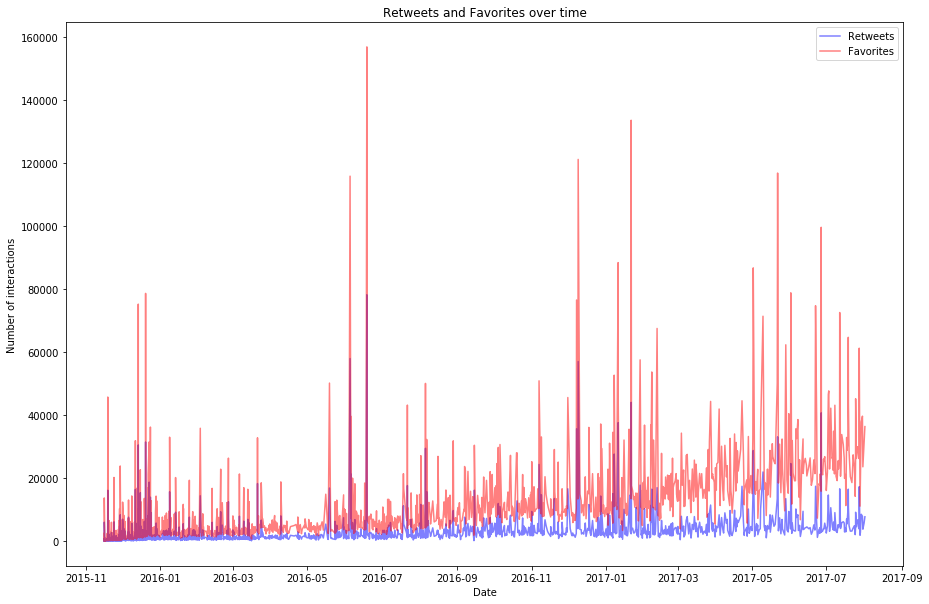

In [1668]:
plt.figure(figsize=(15,10))
plt.plot(twitter_archive_clean_date.retweet_count, color = 'b', alpha = 0.5, label = 'Retweets')
plt.plot(twitter_archive_clean_date.favorite_count, color = 'r', alpha = 0.5, label = 'Favorites')
plt.xlabel('Date')
plt.ylabel('Number of interactions')
plt.title('Retweets and Favorites over time')
plt.legend()
plt.show;

* We can notice an incresing trend in the number of favorites over time, while retweets stay with a more constant number.
* This could possibly indicate that people prefer to interact clickin on the favorite buttom.

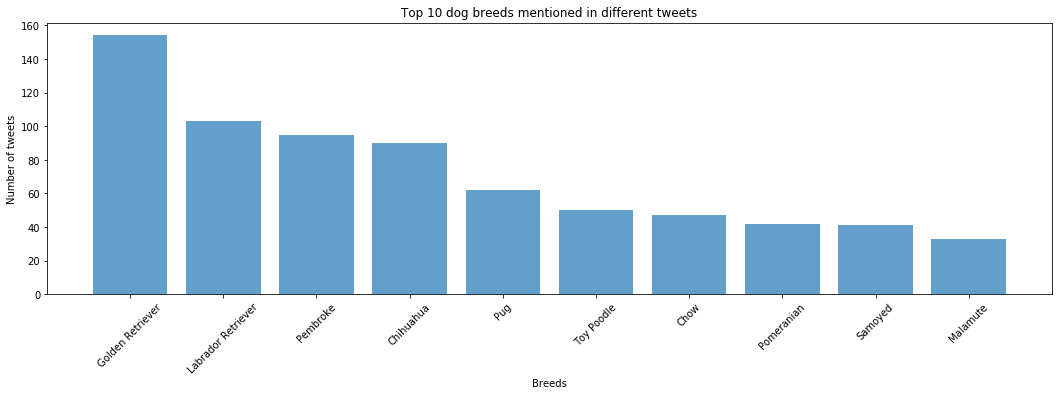

In [1669]:
dog_breed = twitter_archive_clean_date.dog_breed.value_counts().index
dog_breed_values = twitter_archive_clean_date.dog_breed.value_counts().values

f, ax = plt.subplots(figsize=(18,5))
plt.bar(dog_breed[:10], dog_breed_values[:10], alpha = 0.7)
plt.xlabel('Breeds')
plt.ylabel('Number of tweets')
plt.xticks(rotation='45')
plt.title('Top 10 dog breeds mentioned in different tweets');

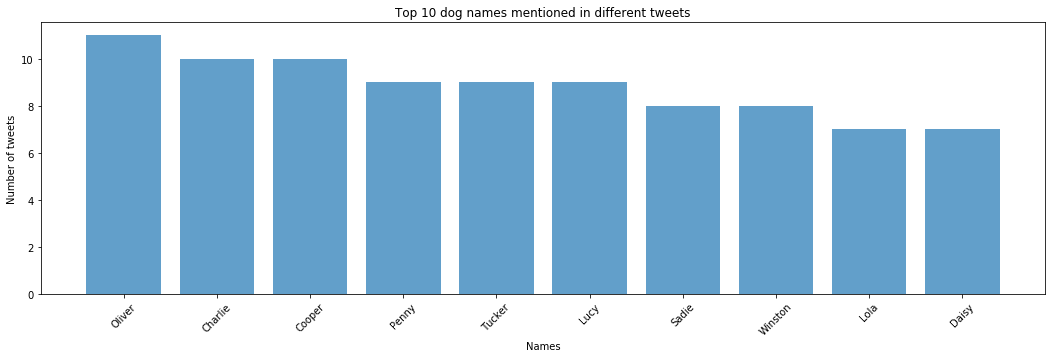

In [1670]:
dog_name = twitter_archive_clean_date.name.value_counts().index
dog_name_values = twitter_archive_clean_date.name.value_counts().values

f, ax = plt.subplots(figsize=(18,5))
plt.bar(dog_name[:10], dog_name_values[:10], alpha = 0.7)
plt.xlabel('Names')
plt.ylabel('Number of tweets')
plt.xticks(rotation='45')
plt.title('Top 10 dog names mentioned in different tweets');

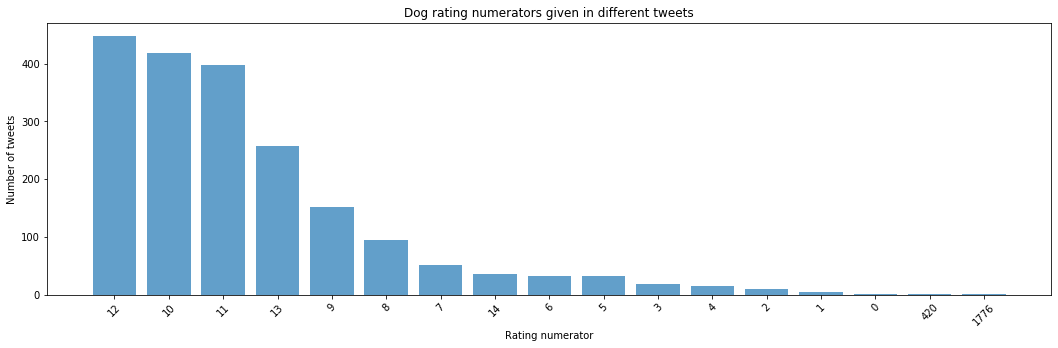

In [1671]:
dog_rating = twitter_archive_clean_date.rating_numerator.value_counts().index
dog_rating_values = twitter_archive_clean_date.rating_numerator.value_counts().values

f, ax = plt.subplots(figsize=(18,5))
plt.bar(np.arange(0,len(dog_rating)), dog_rating_values, alpha = 0.7)
plt.xlabel('Rating numerator')
plt.ylabel('Number of tweets')
plt.xticks(np.arange(0,len(dog_rating)),dog_rating , rotation='45')
plt.title('Dog rating numerators given in different tweets');

In [1672]:
twitter_archive_clean_date.groupby('rating_numerator').rating_numerator.count()

rating_numerator
0       2  
1       4  
2       9  
3       19 
4       15 
5       32 
6       32 
7       51 
8       95 
9       151
10      418
11      398
12      448
13      258
14      35 
420     1  
1776    1  
Name: rating_numerator, dtype: int64

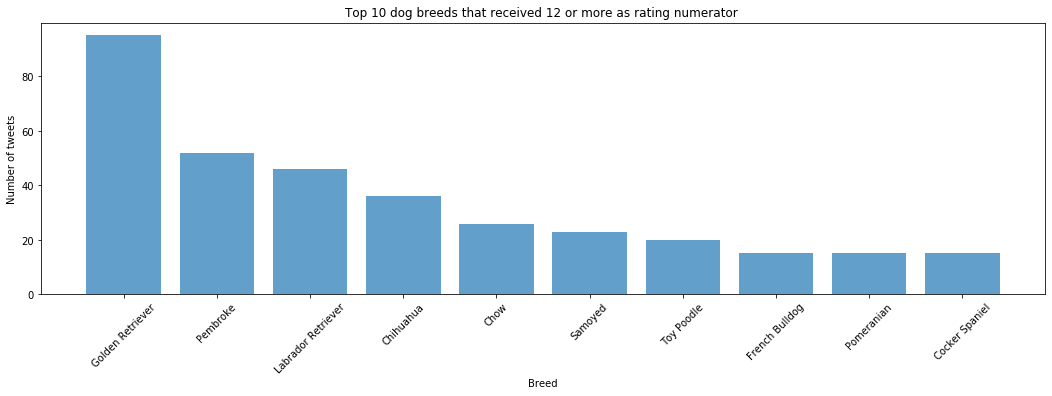

In [1673]:
high_dog_rating = twitter_archive_clean_date.query('rating_numerator >= 12').dog_breed.value_counts().index
high_dog_rating_values = twitter_archive_clean_date.query('rating_numerator >= 12').dog_breed.value_counts().values

f, ax = plt.subplots(figsize=(18,5))
plt.bar(high_dog_rating[:10], high_dog_rating_values[:10], alpha = 0.7)
plt.xlabel('Breed')
plt.ylabel('Number of tweets')
plt.xticks(rotation='45')
plt.title('Top 10 dog breeds that received 12 or more as rating numerator ');

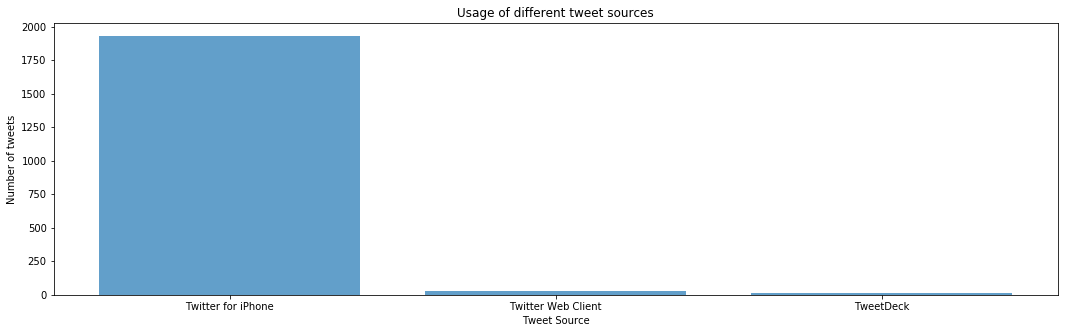

In [1674]:
tweet_source = twitter_archive_clean_date.source.value_counts().index
tweet_source_value = twitter_archive_clean_date.source.value_counts().values

f, ax = plt.subplots(figsize=(18,5))
plt.bar(tweet_source, tweet_source_value, alpha = 0.7)
plt.xlabel('Tweet Source')
plt.ylabel('Number of tweets')
plt.title('Usage of different tweet sources');

In [1675]:
twitter_archive_clean_date.columns

Index(['tweet_id', 'source', 'text', 'urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages', 'jpg_url', 'dog_breed',
       'retweet_count', 'favorite_count'],
      dtype='object')

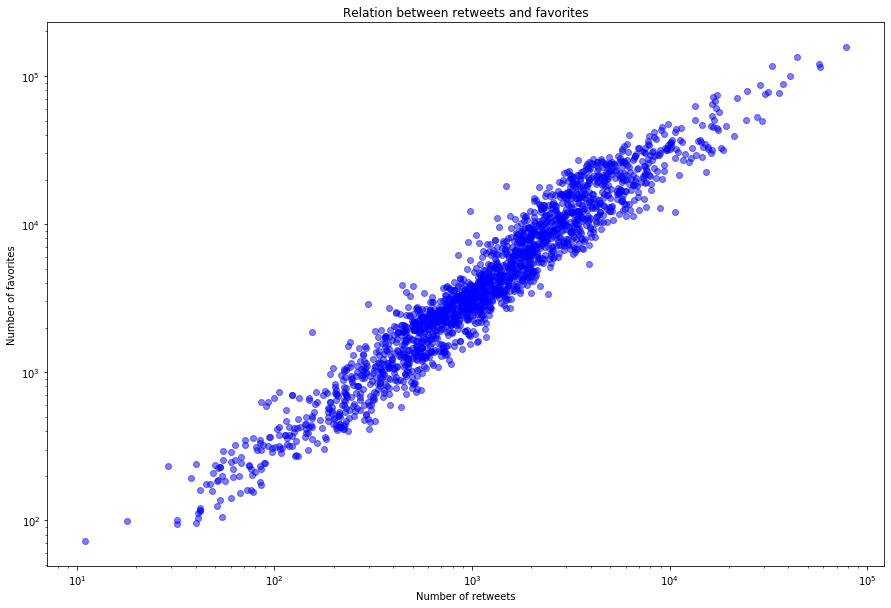

In [1676]:
plt.figure(figsize=(15,10))
plt.scatter(x = twitter_archive_clean_date.retweet_count, y=twitter_archive_clean_date.favorite_count, color = 'b', alpha = 0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of retweets')
plt.ylabel('Number of favorites')
plt.title('Relation between retweets and favorites')
plt.show();

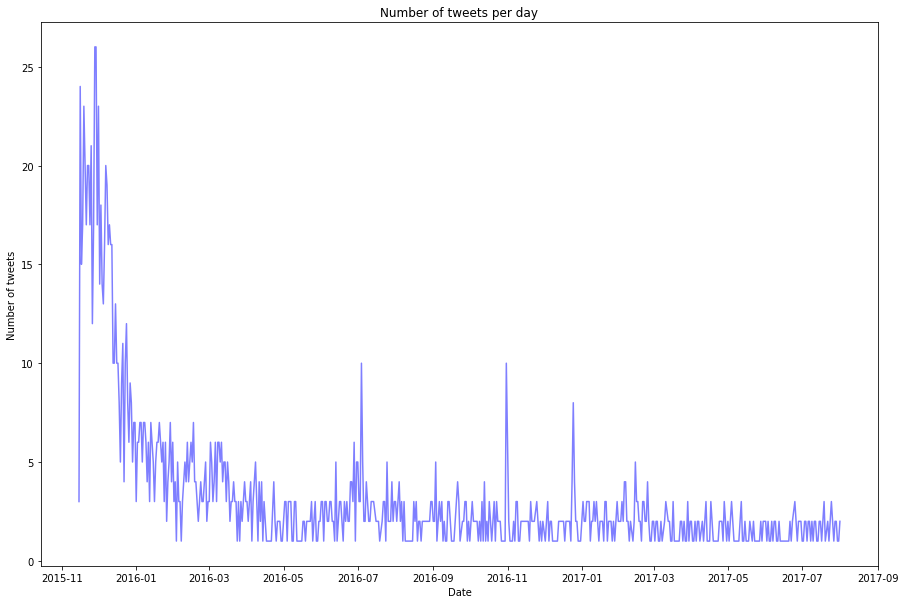

In [1677]:
plt.figure(figsize=(15,10))
plt.plot(dates, color = 'b', alpha = 0.5)
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.title('Number of tweets per day')
plt.show();